# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.6


In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
response_data_btc = requests.get(btc_url) 
btc_data = response_data_btc.json()

# Fetch current BTC price
btc_price = btc_data["data"]["1"]["quotes"]["USD"]["price"]

# Fetch current ETH price
response_data_eth = requests.get(eth_url) 
eth_data = response_data_eth.json()
eth_price = eth_data["data"]["1027"]["quotes"]["USD"]["price"]

# Compute current value of my crpto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $38282.40
The current value of your 5.6 ETH is $10617.54


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
alpaca_api_key = "PKV0WRJ4XVDJVPK6K92N"
alpaca_secret_key = "ZbtIFWYnYZ2Ytohd3awGgOsI6WgMd37Gsj1GVUxt"


# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [8]:
# Format current date as ISO format
today = pd.Timestamp("2021-06-20", tz="Australia/Melbourne").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    limit=1000
).df

# Preview DataFrame
df_portfolio.head()

AGG                                        \
                             open      high      low   close     volume   
time                                                                      
2017-06-29 00:00:00-04:00  109.53  109.6800  109.465  109.64  2457876.0   
2017-06-30 00:00:00-04:00  109.62  109.6273  109.460  109.49  2201175.0   
2017-07-03 00:00:00-04:00  109.30  109.3000  109.010  109.08  1681516.0   
2017-07-05 00:00:00-04:00  109.08  109.1800  109.000  109.15  2694196.0   
2017-07-06 00:00:00-04:00  108.95  109.0000  108.820  108.95  2057393.0   

                              SPY                                       
                             open    high      low   close      volume  
time                                                                    
2017-06-29 00:00:00-04:00     NaN     NaN      NaN     NaN         NaN  
2017-06-30 00:00:00-04:00  242.26  242.71  241.575  241.77  50347309.0  
2017-07-03 00:00:00-04:00  242.91  243.38  242.290  242.32  27234078.0  
2017-07-05 00:00:00-04:00  242.62  243.01  241.700  242.77  41067682.0  
2017-07-06 00:00:00-04:00  241.88  242.03  240.340  240.58  52390161.0

In [9]:
# Pick AGG and SPY close prices
df_portfolio["AGG"]["close"] = pd.to_numeric(df_portfolio["AGG"]["close"], downcast="float")
df_portfolio["SPY"]["close"] = pd.to_numeric(df_portfolio["SPY"]["close"], downcast="float")

agg_close_price = (df_portfolio["AGG"]["close"][-1])
spy_close_price = (df_portfolio["SPY"]["close"][-1])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $114.96
Current SPY closing price: $420.85


/Users/olivergeddes/opt/anaconda3/envs/alpacaenv/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/olivergeddes/opt/anaconda3/envs/alpacaenv/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [10]:
# Compute the current value of shares
my_spy_value = spy_close_price * my_spy
my_agg_value = agg_close_price * my_agg

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $21042.50
The current value of your 200 AGG shares is $22992.00


### Savings Health Analysis

In [11]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
total_portfolio_dictionary = {'Amount': [my_btc_value+my_eth_value, my_spy_value+my_agg_value]}

# Create savings DataFrame
df_savings = pd.DataFrame(total_portfolio_dictionary,index=['Crypto','Shares'])

# Display savings DataFrame
display(df_savings)

,Amount
Crypto,48899.944
Shares,44034.500


array([<AxesSubplot:ylabel='Amount'>], dtype=object)

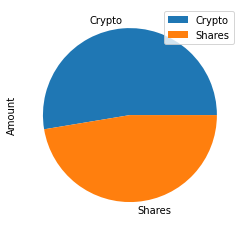

In [14]:
# Plot savings pie chart
df_savings.plot(kind='pie', subplots=True)

In [16]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = df_savings.sum().item()

# Validate saving health
if total_savings > emergency_fund:
    print("Congratulations on having more then enough money in your emergency fund.")
elif total_savings == emergency_fund:
    print("Congratulations on reaching this financial goal")
    print(f'You are ${emergency_fund - total_savings} away from reaching your goal for your emergency fund.')

Congratulations on having more then enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [20]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [21]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)

df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# Display sample data
df_stock_data.head()

AGG                                       \
                             open      high       low   close   volume   
time                                                                     
2020-12-07 00:00:00-05:00  117.76  117.8262  117.6900  117.75  4689469   
2020-12-08 00:00:00-05:00  117.88  117.9597  117.7500  117.77  3587353   
2020-12-09 00:00:00-05:00  117.73  117.7800  117.5172  117.62  4720359   
2020-12-10 00:00:00-05:00  117.74  117.9300  117.6900  117.88  4694024   
2020-12-11 00:00:00-05:00  118.01  118.0900  117.9500  118.03  5537449   

                              SPY                                        
                             open      high     low     close    volume  
time                                                                     
2020-12-07 00:00:00-05:00  369.02  369.6200  367.72  369.1200  40456544  
2020-12-08 00:00:00-05:00  367.72  370.7800  367.67  370.1599  32702217  
2020-12-09 00:00:00-05:00  370.88  371.0500  365.95  366.8900  60700254  
2020-12-10 00:00:00-05:00  365.37  367.8600  364.43  366.7200  47851654  
2020-12-11 00:00:00-05:00  364.90  366.7402  363.26  366.2800  47917103

In [22]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30yr = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [24]:
# Printing the simulation input data
MC_30yr.portfolio_data.head()

AGG                                       \
                             open      high       low   close   volume   
time                                                                     
2020-12-07 00:00:00-05:00  117.76  117.8262  117.6900  117.75  4689469   
2020-12-08 00:00:00-05:00  117.88  117.9597  117.7500  117.77  3587353   
2020-12-09 00:00:00-05:00  117.73  117.7800  117.5172  117.62  4720359   
2020-12-10 00:00:00-05:00  117.74  117.9300  117.6900  117.88  4694024   
2020-12-11 00:00:00-05:00  118.01  118.0900  117.9500  118.03  5537449   

                                           SPY                              \
                          daily_return    open      high     low     close   
time                                                                         
2020-12-07 00:00:00-05:00          NaN  369.02  369.6200  367.72  369.1200   
2020-12-08 00:00:00-05:00     0.000170  367.72  370.7800  367.67  370.1599   
2020-12-09 00:00:00-05:00    -0.001274  370.88  371.0500  365.95  366.8900   
2020-12-10 00:00:00-05:00     0.002211  365.37  367.8600  364.43  366.7200   
2020-12-11 00:00:00-05:00     0.001272  364.90  366.7402  363.26  366.2800   

                                                  
                             volume daily_return  
time                                              
2020-12-07 00:00:00-05:00  40456544          NaN  
2020-12-08 00:00:00-05:00  32702217     0.002817  
2020-12-09 00:00:00-05:00  60700254    -0.008834  
2020-12-10 00:00:00-05:00  47851654    -0.000463  
2020-12-11 00:00:00-05:00  47917103    -0.001200

In [26]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30yr.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.995068,1.004430,1.000961,0.997428,0.996489,0.999147,0.998141,0.984672,1.001891,1.002464,...,1.003129,1.006366,0.996009,1.004556,0.993658,1.002660,0.994113,1.001420,1.007245,1.004435
2,0.989715,1.007261,1.007471,1.001403,0.994567,1.011580,0.995794,0.983860,0.998070,1.010785,...,1.008022,1.008292,0.999229,1.002100,0.987919,0.999651,0.985128,1.011951,1.010046,1.011758
3,0.991321,1.009144,0.998292,1.000528,1.000404,1.011191,0.999968,0.995009,0.995319,1.016614,...,1.015758,1.010312,0.998746,0.998220,0.990575,1.010010,0.975291,1.007190,1.007696,1.005195
4,0.993915,1.013253,0.999811,1.007271,0.999846,1.010098,1.009475,0.999134,1.000984,1.022096,...,1.016390,1.012411,1.001000,0.999548,0.992942,1.006335,0.972245,1.015584,1.006500,1.003690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,88.106804,149.230286,243.218169,113.530652,197.105365,90.389023,235.924331,139.623276,97.635956,274.960254,...,78.801932,60.533480,199.033464,97.016916,108.480324,270.403024,252.974393,126.657641,82.900902,62.566893
7557,88.617132,148.381051,241.112092,113.286136,196.899767,90.306622,236.301031,139.837929,98.005302,276.330518,...,79.266644,60.214339,198.323652,96.948630,108.413047,273.361451,253.422716,126.447859,83.069953,62.499434
7558,88.701506,148.075718,241.896564,112.823583,197.630662,90.079156,238.490791,138.105365,98.434042,275.459670,...,80.012249,60.331309,198.596009,97.159594,107.767262,272.115190,253.783074,127.079260,83.989443,62.443612
7559,89.559836,147.980909,240.454423,113.517418,199.224455,90.140334,238.791792,137.165015,99.021944,275.545656,...,79.582348,60.370809,197.236933,96.425726,108.039404,272.808074,254.424038,127.893399,84.566071,62.197737


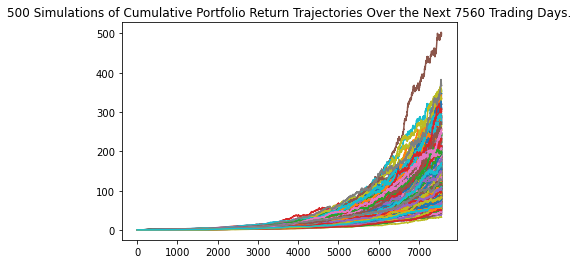

In [27]:
# Plot simulation outcomes
line_plot = MC_30yr.plot_simulation()

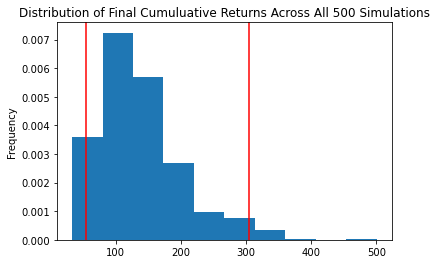

In [28]:
# Plot probability distribution and confidence intervals
dist_plot = MC_30yr.plot_distribution()

### Retirement Analysis

In [29]:
# Fetch summary statistics from the Monte Carlo simulation results
sum_tbl = MC_30yr.summarize_cumulative_return()

# Print summary statistics
print(sum_tbl)

count           500.000000
mean            138.650278
std              64.519666
min              33.071344
25%              93.408121
50%             125.080333
75%             167.613352
max             500.057236
95% CI Lower     53.685097
95% CI Upper    304.296890
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [38]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(sum_tbl[8]*initial_investment,2)
ci_upper = round(sum_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $1073701.94 and $6085937.8


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [30]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(sum_tbl[8]*initial_investment,2)
ci_upper = round(sum_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $1610552.91 and $9128906.7


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [31]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5yr = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [32]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5yr.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.992020,0.996405,0.997182,1.001858,0.996645,0.999685,1.009010,1.001107,0.996500,1.000596,...,1.003159,0.998031,0.997979,1.002064,0.999857,0.996081,0.999786,1.003790,0.989587,1.002311
2,0.996166,0.992821,0.994998,0.993340,0.995208,0.995167,1.003073,0.997969,0.987448,0.997340,...,1.000682,1.002573,0.988918,1.000878,1.001596,0.993917,0.998043,1.008782,0.990403,1.000506
3,0.995509,0.991700,0.983955,0.992449,0.991108,1.007096,1.004478,1.007111,0.986457,0.988991,...,0.995599,1.008434,0.994329,1.007204,1.004835,0.991016,1.001061,1.022067,0.987756,0.996925
4,0.995931,0.998010,0.980112,0.999131,0.990933,1.016840,1.001062,0.999962,0.982072,0.993071,...,0.986934,1.000505,1.000742,1.003937,1.009837,0.993519,1.002943,1.028361,0.992968,1.006365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,2.354381,2.312225,2.081698,2.131438,2.146065,2.144581,2.093286,2.034078,3.755601,2.774889,...,2.222161,2.067450,2.101470,2.261527,2.276705,1.890673,2.354507,2.219586,2.568088,2.518976
1257,2.350386,2.314913,2.087315,2.125737,2.150135,2.159353,2.084876,2.051422,3.751859,2.790684,...,2.215266,2.091678,2.107173,2.282660,2.278454,1.883370,2.334107,2.221937,2.572462,2.480926
1258,2.318841,2.322775,2.095191,2.117929,2.155766,2.145402,2.099365,2.053504,3.798822,2.790565,...,2.220931,2.092647,2.112818,2.276167,2.287130,1.877853,2.335422,2.202489,2.580738,2.479893
1259,2.348858,2.312131,2.099139,2.125671,2.160073,2.135699,2.090933,2.077128,3.774999,2.802467,...,2.241750,2.109464,2.105459,2.285399,2.295683,1.878989,2.319397,2.213077,2.573988,2.497079


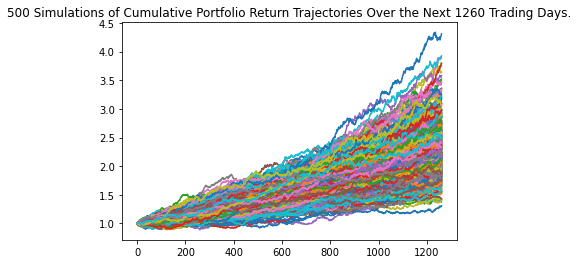

In [34]:
# Plot simulation outcomes
line_plot = MC_5yr.plot_simulation()

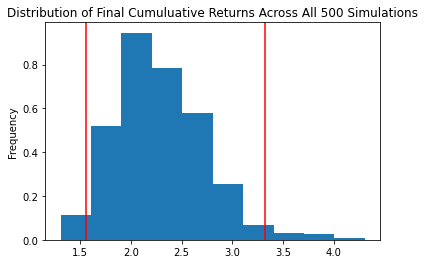

In [35]:
# Plot probability distribution and confidence intervals
dist_plot = MC_5yr.plot_distribution()

In [36]:
# Fetch summary statistics from the Monte Carlo simulation results
sum_tbl2 = MC_5yr.summarize_cumulative_return()

# Print summary statistics
print(sum_tbl2)

count           500.000000
mean              2.287641
std               0.444579
min               1.305128
25%               1.962644
50%               2.235163
75%               2.533216
max               4.308985
95% CI Lower      1.559259
95% CI Upper      3.326523
Name: 1260, dtype: float64


In [41]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(sum_tbl2[8]*initial_investment,2)
ci_upper_five = round(sum_tbl2[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 5 years will end within in the range of $31185.18 and $66530.46


### Ten Years Retirement Option

In [42]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10yr = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [43]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10yr.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.001991,1.005104,0.991148,1.006224,1.004516,1.001226,0.999918,0.998532,1.007495,0.991565,...,0.994734,0.998160,0.994799,1.001083,0.993301,1.003104,1.001233,0.997362,0.995191,1.002378
2,1.003955,1.002815,0.993318,1.005706,0.999221,1.002379,0.999627,0.992203,1.010460,0.984171,...,1.004542,1.005697,0.995369,0.999808,0.989954,1.002954,1.004584,0.999767,0.995656,1.006361
3,1.010652,1.003527,0.995818,1.001632,1.000843,1.000513,1.004805,0.988166,1.012899,0.993564,...,0.999130,1.016012,0.990478,1.000525,0.981596,0.998950,1.011096,1.001341,1.000078,1.012060
4,1.002159,0.999709,0.985233,0.991974,1.004226,0.998844,1.007812,0.985537,1.012808,0.986263,...,1.006604,1.016236,0.991002,0.993692,0.987020,1.009517,1.002562,0.999690,1.008382,1.014112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,3.615198,5.044122,4.446909,4.782471,4.943982,3.200996,4.812370,7.257385,4.345349,3.373159,...,4.836714,4.557179,5.970508,7.469849,4.170506,6.605667,3.689587,5.253267,5.278308,7.240226
2517,3.635110,5.083075,4.436442,4.792744,4.921337,3.206989,4.839486,7.242859,4.326641,3.381073,...,4.824386,4.536209,5.991540,7.502996,4.147113,6.624754,3.684913,5.239677,5.286218,7.259707
2518,3.653947,5.106193,4.421726,4.783649,4.928363,3.235712,4.792012,7.245935,4.325087,3.378432,...,4.783367,4.570085,5.991880,7.570065,4.143248,6.574945,3.693620,5.218937,5.321964,7.224893
2519,3.676815,5.108969,4.425727,4.788800,4.914541,3.254968,4.809633,7.345613,4.308928,3.368339,...,4.788234,4.598173,5.996929,7.554015,4.137549,6.564382,3.676533,5.205964,5.318411,7.213714


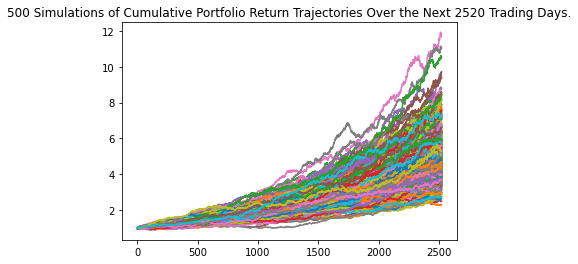

In [44]:
# Plot simulation outcomes
line_plot = MC_10yr.plot_simulation()

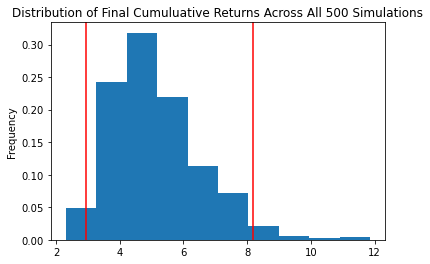

In [45]:
# Plot probability distribution and confidence intervals
dist_plot = MC_10yr.plot_distribution()

In [46]:
# Fetch summary statistics from the Monte Carlo simulation results
sum_tbl3 = MC_10yr.summarize_cumulative_return()

# Print summary statistics
print(sum_tbl3)

count           500.000000
mean              5.124283
std               1.377745
min               2.305223
25%               4.139809
50%               4.888498
75%               5.909797
max              11.859466
95% CI Lower      2.949598
95% CI Upper      8.176526
Name: 2520, dtype: float64


In [47]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(sum_tbl2[8]*initial_investment,2)
ci_upper_ten = round(sum_tbl2[9]*initial_investment,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 10 years will end within in the range of $31185.18 and $66530.46
